**###### Second Optimization Test ######** 
---
Bin the "NAMES" together instead of dropping the column as it seems some companies apply for investment funding repeatedly. Bin "NAMES" into an "Other" labeling if they appear less than 10 times.

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
url = "https://drive.google.com/file/d/1xRlZqRGPecTUmGXoGHwbzsEFra8-0YLk/view?usp=sharing"
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
application_df_orig = pd.read_csv(url)
application_df_orig.head()


,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN'.
application_df2 = application_df_orig.drop(columns="EIN")
application_df2.head()


,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [3]:
# Replace the application value counts if counts are less than 500 for binning
# Gather APPLICATION_TYPE value counts for binning
count_application_type = application_df2["APPLICATION_TYPE"].value_counts()

replace_application = list(count_application_type[count_application_type < 500].index)

# Replace in dataframe
for app in replace_application:
    application_df2.APPLICATION_TYPE = application_df2.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df2.APPLICATION_TYPE.value_counts()


T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [4]:
# Replace the classification value counts if counts are less than 1000 for binning
# Gather CLASSIFICATION value counts for binning
count_classification = application_df2["CLASSIFICATION"].value_counts()

replace_class = list(count_classification[count_classification < 1000].index)

# Replace in dataframe
for cls in replace_class:
    application_df2.CLASSIFICATION = application_df2.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df2.CLASSIFICATION.value_counts()


C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [5]:
# Replace the names value counts if counts are less than 10 for binning
# Gather CLASSIFICATION value counts for binning
count_names = application_df2["NAME"].value_counts()

replace_names = list(count_names[count_names < 10].index)

# Replace in dataframe
for name in replace_names:
    application_df2.NAME = application_df2.NAME.replace(name,"Other")
    
# Check to make sure binning was successful
application_df2.NAME.value_counts()


Other                                      21022
PARENT BOOSTER USA INC                      1260
TOPS CLUB INC                                765
UNITED STATES BOWLING CONGRESS INC           700
WASHINGTON STATE UNIVERSITY                  492
                                           ...  
CASCADE 4-H FOUNDATION                        10
FREE & ACCEPTED MASONS OF WASHINGTON          10
NEW MEXICO GARDEN CLUBS INC                   10
NATIONAL ASSOCIATION OF HISPANIC NURSES       10
UNION OF CALIFORNIA STATE WORKERS             10
Name: NAME, Length: 223, dtype: int64

In [6]:
# Generate our categorical variable lists
application_cat2 = application_df2.dtypes[application_df2.dtypes == "object"].index.tolist()
application_cat2

['NAME',
 'APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [7]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df2 = pd.DataFrame(enc.fit_transform(application_df2[application_cat2]))

# Add the encoded variable names to the dataframe
encode_df2.columns = enc.get_feature_names_out(application_cat2)
encode_df2.head()

,NAME_ACE MENTOR PROGRAM OF AMERICA INC,NAME_AIR FORCE ASSOCIATION,NAME_ALABAMA FEDERATION OF WOMENS CLUBS,NAME_ALABAMA TREASURE FOREST ASSOCIATION,NAME_ALPHA PHI SIGMA,NAME_ALPHA PHI SIGMA INC,NAME_ALTRUSA INTERNATIONAL FOUNDATION INC,NAME_AMATEUR ATHLETIC UNION OF THE UNITED STATES,NAME_AMATEUR ATHLETIC UNION OF THE UNITED STATES INC,NAME_AMERICAN ART THERAPY ASSOCIATION INC,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [8]:
# Merge one-hot encoded features and drop the originals
application_df2 = application_df2.merge(encode_df2,left_index=True, right_index=True)
application_df2 = application_df2.drop(application_cat2,1)
application_df2.head()


<ipython-input-8-ae7ba9b06234>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  application_df2 = application_df2.drop(application_cat2,1)


,STATUS,ASK_AMT,IS_SUCCESSFUL,NAME_ACE MENTOR PROGRAM OF AMERICA INC,NAME_AIR FORCE ASSOCIATION,NAME_ALABAMA FEDERATION OF WOMENS CLUBS,NAME_ALABAMA TREASURE FOREST ASSOCIATION,NAME_ALPHA PHI SIGMA,NAME_ALPHA PHI SIGMA INC,NAME_ALTRUSA INTERNATIONAL FOUNDATION INC,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [9]:
# Split our preprocessed data into our features and target arrays
y2 = application_df2["IS_SUCCESSFUL"].values
X2 = application_df2.drop(["IS_SUCCESSFUL"],axis=1).values

# Split the preprocessed data into a training and testing dataset
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, random_state=42)


In [10]:
# Create a StandardScaler instances
scaler2 = StandardScaler()

# Fit the StandardScaler
X_scaler2 = scaler2.fit(X_train2)

# Scale the data
X_train_scaled2 = X_scaler2.transform(X_train2)
X_test_scaled2 = X_scaler2.transform(X_test2)


In [11]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features2 = len(X_train_scaled2[0])
hidden_nodes_layer1_2 = 20
hidden_nodes_layer2_2 = 5


nn2 = tf.keras.models.Sequential()

# First hidden layer
nn2.add(tf.keras.layers.Dense(units=hidden_nodes_layer1_2, 
                             input_dim=number_input_features2, 
                             activation="relu")
)

# Second hidden layer
nn2.add(tf.keras.layers.Dense(units=hidden_nodes_layer2_2, activation="relu"))


# Output layer
## Sigmoid is slightly more in-depth than RELU, which makes it a good model to output with
nn2.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                5340      
                                                                 
 dense_1 (Dense)             (None, 5)                 105       
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
Total params: 5,451
Trainable params: 5,451
Non-trainable params: 0
_________________________________________________________________


In [12]:
# Compile the model
nn2.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])


In [13]:
# Create a callback that saves weights every 5 Epochs
# import dependency
import os

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

# Create the callback variable
mc = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq='epoch')


# Train the model
fit_model2 = nn2.fit(X_train2,y_train2,epochs=25, callbacks = [mc])


Epoch 1/25
801/804 [============================>.] - ETA: 0s - loss: 5726.2686 - accuracy: 0.4998
Epoch 1: saving model to checkpoints/weights.01.hdf5
804/804 [==============================] - 3s 3ms/step - loss: 5706.4551 - accuracy: 0.4998
Epoch 2/25
789/804 [============================>.] - ETA: 0s - loss: 2330.1572 - accuracy: 0.5123
Epoch 2: saving model to checkpoints/weights.02.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 2295.3840 - accuracy: 0.5127
Epoch 3/25
794/804 [============================>.] - ETA: 0s - loss: 3421.6802 - accuracy: 0.5189
Epoch 3: saving model to checkpoints/weights.03.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 3397.6211 - accuracy: 0.5182
Epoch 4/25
790/804 [============================>.] - ETA: 0s - loss: 2981.2390 - accuracy: 0.4913
Epoch 4: saving model to checkpoints/weights.04.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 2941.0281 - accuracy: 0.4906
Epoch 5/25
793/804 [====

In [14]:
# Evaluate the model using the test data
model_loss2, model_accuracy2 = nn2.evaluate(X_test_scaled2,y_test2,verbose=2)
print(f"Loss: {model_loss2}, Accuracy: {model_accuracy2}")


268/268 - 1s - loss: 0.5437 - accuracy: 0.7626 - 571ms/epoch - 2ms/step
Loss: 0.5437097549438477, Accuracy: 0.7625656127929688


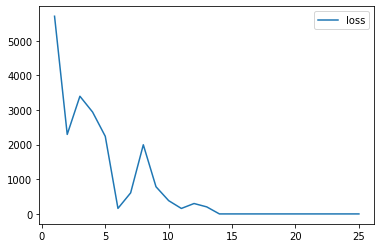

In [15]:
# Create a DataFrame containing training history
history_df2 = pd.DataFrame(fit_model2.history, index=range(1,len(fit_model2.history["loss"])+1))

# Plot the loss
history_df2.plot(y="loss")


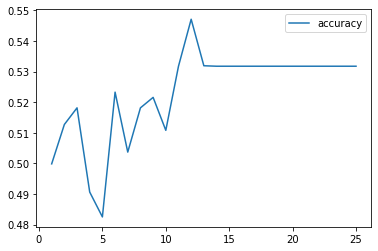

In [16]:
# Plot the accuracy
history_df2.plot(y="accuracy")


In [17]:
# Export our model to HDF5 file
nn2.save("trained_application2.h5")


In [18]:
# Google Collab
from google.colab import files
files.download("trained_application2.h5")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>